# User Story 3 : Entraînement des modèles de clustering avec K-Means

## Détermination de la valeur optimale de k avec les méthodes du coude et du silhouette

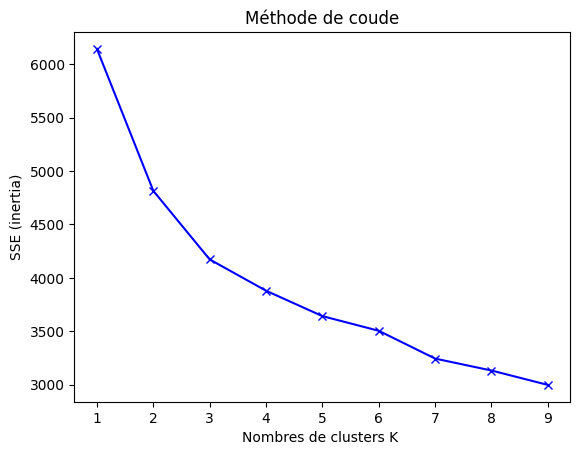

In [1]:
import pandas as pd
import matplotlib.pyplot as mpt
import seaborn as sbn
import numpy as np
from sklearn.cluster import KMeans

file = r"B:\Machine Learning\Sprint1\YC2_DiabetesTrackAI\data\Ready_For_Model.csv"
content = pd.read_csv(file)

sse = []
k = range(1,10)
for i in k:
    kmeans = KMeans(n_clusters=i,random_state=42)
    kmeans.fit(content)
    sse.append(kmeans.inertia_)
mpt.plot(k,sse,'bx-')
mpt.xlabel('Nombres de clusters K ')
mpt.ylabel('SSE (inertia)')
mpt.title('Méthode de coude')
mpt.show()

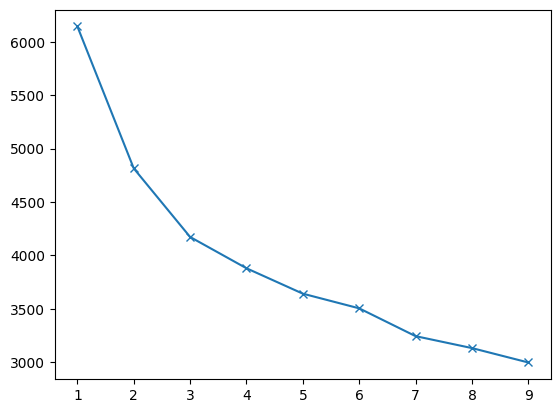

In [2]:
sse = []
k=range(1,10)

for i in k:
    kmean = KMeans(n_clusters=i,random_state=42)
    kmean.fit(content)
    sse.append(kmean.inertia_)

mpt.plot(k,sse,'x-')
mpt.show()

## Évaluation de la qualité du regroupement à l’aide du score de silhouette

In [3]:
from sklearn.metrics import silhouette_score
k = range(2,10)
for i in k:
    kmeans = KMeans(n_clusters=i,random_state=42)
    labels = kmeans.fit_predict(content)
    score = silhouette_score(content,labels)
    print(f"silhouette_score pour cluster {i} :{score:.3f}")

silhouette_score pour cluster 2 :0.203
silhouette_score pour cluster 3 :0.189
silhouette_score pour cluster 4 :0.145
silhouette_score pour cluster 5 :0.144
silhouette_score pour cluster 6 :0.118
silhouette_score pour cluster 7 :0.144
silhouette_score pour cluster 8 :0.124
silhouette_score pour cluster 9 :0.127


## Entraînement du modèle K-Means

In [4]:
kmeans = KMeans(n_clusters=2,random_state=42)
labels = kmeans.fit_predict(content)

print(kmeans.cluster_centers_)

import joblib
joblib.dump(kmeans, '../models/kmeans.pkl')


[[ 0.41315731  0.68186382  0.46141556  0.51787749  0.63688271  0.5220598
   0.13254108  0.53588433]
 [-0.34053584 -0.56201127 -0.38031163 -0.42684914 -0.52493658 -0.43029632
  -0.10924408 -0.44169088]]


['../models/kmeans.pkl']

## Ajout de la colonne “Cluster” au dataset

In [5]:
content['Cluster'] = labels
content.groupby("Cluster").mean()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Cluster,,,,,,,,
0,0.413157,0.681864,0.461416,0.517877,0.636883,0.522060,0.132541,0.535884
1,-0.340536,-0.562011,-0.380312,-0.426849,-0.524937,-0.430296,-0.109244,-0.441691


## Visualisation des clusters à l’aide de la PCA

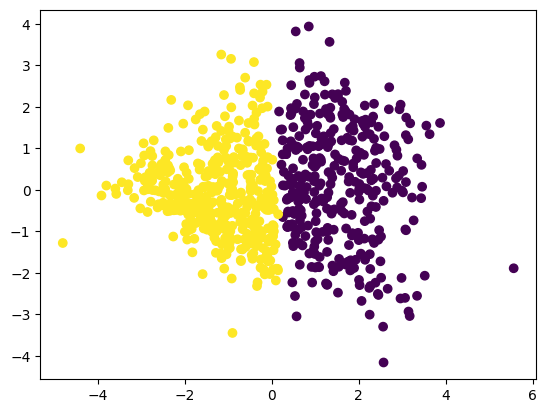

Cluster
1    421
0    347
Name: count, dtype: int64

In [6]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
content_pca = pca.fit_transform(content)

mpt.scatter(content_pca[:,0], content_pca[:,1], c=labels)
mpt.show()

content["Cluster"].value_counts()

#Cluster 1 contient 396 individus et Cluster 0 en contient 372, une répartition assez équilibrée.
#Sur le graphique PCA, les deux clusters apparaissent bien séparés, indiquant une distinction claire entre les groupes.
#PCA (Analyse en Composantes Principales) est une technique utilisée pour réduire la dimensionnalité de vos données tout 
# en conservant la majeure partie de l’information importante.

In [7]:
content.to_csv("../data/Clustered_Data.csv",index=False)